# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

<b>Шаги для выбора локации:</b>

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

<b>Описание данных</b>

Данные геологоразведки трёх регионов находятся в файлах:

id — уникальный идентификатор скважины;

f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);

product — объём запасов в скважине (тыс. баррелей).

## Загрузка и подготовка данных

In [1]:
import pandas as pd
import math as mt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### Регион 1

In [2]:
def data_view(data):
    
    """
    Функция вызвращает данные о таблице
    """
    return display(data.head(), 
                   data.info(), 
                   data.describe(), 
                   data.isna().sum())

In [3]:
df_0 = pd.read_csv('/datasets/geo_data_0.csv')
df_1 = pd.read_csv('/datasets/geo_data_1.csv')
df_2 = pd.read_csv('/datasets/geo_data_2.csv')

data_view(df_0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


None

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

### Регион 2

In [4]:
data_view(df_1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


None

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

### Регион 3

In [5]:
data_view(df_2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


None

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

## Обучение и проверка модели

In [6]:
def data_markup(data, target, string_row):
    
    """
    Функция возращает масшабированные обучающую и валидационную выборки.
    """
    
    features = data.drop([target, string_row], axis=1)
    target = data[target]
    
    features_train, features_valid, target_train, target_valid = train_test_split(
        features, target, test_size=0.25, random_state=12345)
    
    scaler = StandardScaler()
    scaler.fit(features_train)
    features_train = scaler.transform(features_train)
    features_valid = scaler.transform(features_valid)
    
    return features_train, features_valid, target_train, target_valid

In [7]:
target_valid_df = []
predicted_valid_df = []

for name, df in {'Регион_1': df_0, 'Регион_2': df_1, 'Регион_3': df_2}.items():
    
    features_train, features_valid, target_train, target_valid = data_markup(df, 'product', 'id')

    model = LinearRegression()
    model.fit(features_train, target_train)
    
    predicted_valid = model.predict(features_valid)
    mse = mean_squared_error(target_valid, predicted_valid)
    
    predicted_valid_df.append(predicted_valid)
    target_valid_df.append(target_valid)
   
    print(f'Средний запас предсказанного сырья - {name}: {predicted_valid.mean():.2f}')
    print(f'RMSE: {mse ** 0.5:.2f}')
    print()

Средний запас предсказанного сырья - Регион_1: 92.59
RMSE: 37.58

Средний запас предсказанного сырья - Регион_2: 68.73
RMSE: 0.89

Средний запас предсказанного сырья - Регион_3: 94.97
RMSE: 40.03



### Вывод

- Самое большое значение среднего запаса в регионе 3.
- Самое большое среднеквадратичное отклонение в регионе 3.
- Регион 1 и 3 имеют близкие харатеристики и на первый взгляд более привлекательны, чем регион 2.

## Подготовка к расчёту прибыли

In [8]:
# количество исследуемых точек
RESEARCH_POINT = 500

# количество отобранных точек для разработки
DEV_POINT = 200

# бюджет на разработку
DEV_BUDGET = 10e+9

# бюджет на разработку одной скаважины
DEV_BUDGET_ONE = DEV_BUDGET / DEV_POINT

# стоимость 1 тыс. баррелей
INCOME_UNIT = 450e+3

# необходимый запас нефти в тыс. баррелей для безубыточной разработки
# т.е. прибыль больше или равна затратам
MIN_VOLUME = DEV_BUDGET_ONE / INCOME_UNIT

print(f'Достаточный объём сырья для безубыточной разработки новой скважины: {MIN_VOLUME} тыс.баррелей')

Достаточный объём сырья для безубыточной разработки новой скважины: 111.11111111111111 тыс.баррелей


### Вывод

- Минимальный объем запаса выше примерно на 15 тыс. баррелей чем в среднем для региона 1 и 3, и на 40 тыс. быррелей чем в регионе 2.
- Исходя только из этих данных, то не один регион не принесёт прибыли.

## Расчёт прибыли и рисков 

In [9]:
def profit_region(predicted_valid, target_valid):
    
    """
    Функция возращает значение общей прибыли 200 скважин с наибольшим запасом сырья, 
    принимая на вход предсказания по объему сырья и реальные значения целевого признака,
    а также используя заданные значения income_unit(доход с 1 тыс. баррелей) и 
    dev_budget(затраты на разработку в регионе)
    """
    
    predicted_valid = pd.Series(data=predicted_valid, index=target_valid.index).sort_values(ascending=False)
    target_valid = target_valid[predicted_valid.index]
    total_income = target_valid.head(DEV_POINT).sum() * INCOME_UNIT - DEV_BUDGET
    
    return total_income

In [10]:
def criteria_region(target_valid, predicted_valid):

    """
    Функция выводит значения средней прибыли, 95% доверительного интервала и 
    риска убытков после применеия техники Bootstrap с 1000 выборок на основе
    предсказаний и реальных значений.
    """
    
    state = np.random.RandomState(12345)

    values = []
    for i in range(1000):
        target_subsample = target_valid.sample(n=RESEARCH_POINT, replace=True, random_state=state)
        volume_subsamlpe = pd.Series(data=predicted_valid, index=target_valid.index)[target_subsample.index]
        profit_subsamlpe = profit_region(pd.Series(volume_subsamlpe), target_subsample)
        values.append(profit_subsamlpe)

    values = pd.Series(values)

    profit_mean = values.mean() / 1e+9
    lower = values.quantile(q=0.025) / 1e+9
    upper = values.quantile(q=0.975) / 1e+9
    risk_loss = (values < 0).mean() # вероятность отрицательного значения из списка values
    
    return [round(profit_mean, 2), round(lower, 2), round(upper, 2), round(risk_loss, 2)]

<AxesSubplot:>

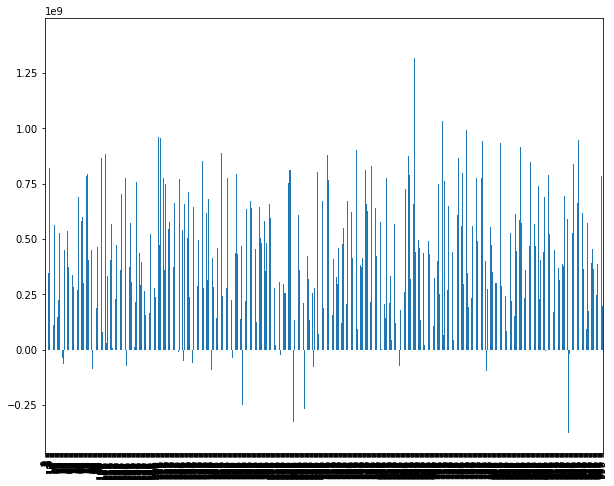

In [20]:
def criteria_region(target_valid, predicted_valid):

    """
    Функция выводит значения средней прибыли, 95% доверительного интервала и 
    риска убытков после применеия техники Bootstrap с 1000 выборок на основе
    предсказаний и реальных значений.
    """
    
    state = np.random.RandomState(12345)

    values = []
    for i in range(1000):
        target_subsample = target_valid.sample(n=RESEARCH_POINT, replace=True, random_state=state)
        volume_subsamlpe = pd.Series(data=predicted_valid, index=target_valid.index)[target_subsample.index]
        profit_subsamlpe = profit_region(pd.Series(volume_subsamlpe), target_subsample)
        values.append(profit_subsamlpe)

    values = pd.Series(values)
    return values


criteria_region(target_valid_df[0], predicted_valid_df[0]).plot(kind='bar', figsize=(10, 8))

## Вывод

In [11]:
pd.DataFrame(np.array([criteria_region(target_valid_df[0], predicted_valid_df[0]), 
                       criteria_region(target_valid_df[1], predicted_valid_df[1]), 
                       criteria_region(target_valid_df[2], predicted_valid_df[2])]), 
             columns=['средняя прибыль, млрд руб', 
                      'min-95%, млрд руб', 
                      'max-95%, млрд руб', 
                      'риск убытков'], 
             index=['регион 1', 'регион 2', 'регион 3'])

,"средняя прибыль, млрд руб","min-95%, млрд руб","max-95%, млрд руб",риск убытков
регион 1,0.43,-0.10,0.95,0.06
регион 2,0.52,0.07,0.93,0.01
регион 3,0.44,-0.13,0.97,0.06


<b> - Средняя прибыль выше всего в регионе 2 - 0.52, также 95% доверительный интервал лежит в положительных значениях - (0.07-0.093) и риск убытков наименьший - 0.01.</b>

<b> - На основе полученных результатов, рекомендуется для разработки регион 2.</b>